# ML_LAB_03
# REG NO:BL.EN.U4CSE23109

A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If your data deals with multiple classes, you can take any two classes. Steps below (refer below diagram for understanding):

•Calculate the mean for each class (also called as class centroid) (Suggestion: You may use numpy.mean() function for finding the average vector for all vectors in a given class. Please define the axis property appropriately to use this function. EX: feat_vecs.mean(axis=0))

•Calculate spread (standard deviation) for each class (Suggestion: You may use numpy.std() function for finding the standard deviation vector for all vectors in a given class. Please define the axis property appropriately to use this function.)

•Calculate the distance between mean vectors between classes (Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean distance between two centroids.)


In [ ]:
import numpy as np
import pandas as pd

def compute_class_centroid(data: np.ndarray) -> np.ndarray:
    return data.mean(axis=0)

def compute_class_spread(data: np.ndarray) -> np.ndarray:
    return data.std(axis=0)

def compute_interclass_distance(centroid1: np.ndarray, centroid2: np.ndarray) -> float:
    return np.linalg.norm(centroid1 - centroid2)

# Load your dataset
df = pd.read_csv("/content/MHDS.csv")

# Define label column and numeric features
label_column = 'Mental_Health_Condition'
numeric_features = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']

# Filter out only required columns
features_df = df[numeric_features]
labels = df[label_column]

# Combine features and label, drop rows with missing values
clean_df = pd.concat([features_df, labels], axis=1).dropna()

# Final features and labels
X = clean_df[numeric_features].values
y = clean_df[label_column].values

# Identify unique class labels
unique_classes = np.unique(y)
if len(unique_classes) < 2:
    raise ValueError("Need at least two distinct classes to compute interclass distance.")

class_1_label = unique_classes[0]
class_2_label = unique_classes[1]

# Separate features by class
X_class1 = X[y == class_1_label]
X_class2 = X[y == class_2_label]

# Compute centroids
centroid1 = compute_class_centroid(X_class1)
centroid2 = compute_class_centroid(X_class2)

# Compute spreads
spread1 = compute_class_spread(X_class1)
spread2 = compute_class_spread(X_class2)

# Compute interclass distance
distance = compute_interclass_distance(centroid1, centroid2)

# Display results
print(f"Centroid of Class '{class_1_label}':\n{centroid1}")
print(f"\nCentroid of Class '{class_2_label}':\n{centroid2}")

print(f"\nSpread of Class '{class_1_label}':\n{spread1}")
print(f"\nSpread of Class '{class_2_label}':\n{spread2}")

print(f"\nInterclass Distance between Class '{class_1_label}' and Class '{class_2_label}': {distance:.4f}")


Centroid of Class 'No':
[41.55153382  7.01073071 55.06727193  4.96372435  3.24357877]

Centroid of Class 'Yes':
[41.39460735  7.0091371  55.05844701  5.00036004  3.24274113]

Spread of Class 'No':
[13.8596105   1.72663982 14.67883435  3.1664366   1.57911134]

Spread of Class 'Yes':
[13.82801683  1.73865398 14.70401337  3.15690288  1.59130578]

Interclass Distance between Class 'No' and Class 'Yes': 0.1614


A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and variance from the available data. (Suggestion: numpy.histogram()gives the histogram data. Plot of histogram may be achieved with matplotlib.pyplot.hist())

Mean of 'Sleep_Hours': 7.01
Variance of 'Sleep_Hours': 3.00


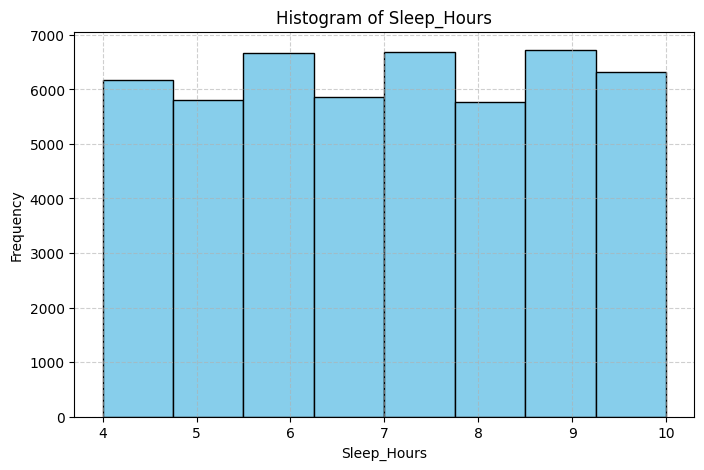

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/MHDS.csv")

# Choose the feature to analyze
feature_name = 'Sleep_Hours'

# Drop missing values in the selected feature
feature_data = df[feature_name].dropna().values

# Compute mean and variance
mean_val = np.mean(feature_data)
variance_val = np.var(feature_data)

# Print mean and variance
print(f"Mean of '{feature_name}': {mean_val:.2f}")
print(f"Variance of '{feature_name}': {variance_val:.2f}")

# Plot histogram using matplotlib
plt.figure(figsize=(8, 5))
plt.hist(feature_data, bins=8, color='skyblue', edgecolor='black')
plt.title(f"Histogram of {feature_name}")
plt.xlabel(feature_name)
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 to 10. Make a plot of the distance and observe the nature of this graph.

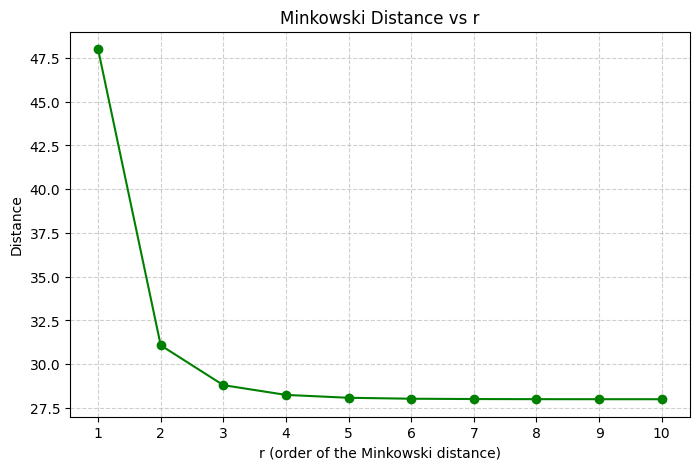

r = 1: Distance = 48.0000
r = 2: Distance = 31.0818
r = 3: Distance = 28.8042
r = 4: Distance = 28.2476
r = 5: Distance = 28.0830
r = 6: Distance = 28.0293
r = 7: Distance = 28.0107
r = 8: Distance = 28.0040
r = 9: Distance = 28.0015
r = 10: Distance = 28.0006


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def minkowski_distance(vec1, vec2, r):
    """
    Compute Minkowski distance between two vectors for a given r.
    """
    return np.sum(np.abs(vec1 - vec2) ** r) ** (1 / r)

# Load dataset
df = pd.read_csv("/content/MHDS.csv")

# Select numeric features only
numeric_features = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']
numeric_data = df[numeric_features].dropna()

# Select any two feature vectors (rows)
vector1 = numeric_data.iloc[0].values
vector2 = numeric_data.iloc[1].values

# Calculate Minkowski distances for r = 1 to 10
r_values = list(range(1, 11))
distances = [minkowski_distance(vector1, vector2, r) for r in r_values]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(r_values, distances, marker='o', color='green')
plt.title("Minkowski Distance vs r")
plt.xlabel("r (order of the Minkowski distance)")
plt.ylabel("Distance")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(r_values)
plt.show()

# Optional: print distances
for r, d in zip(r_values, distances):
    print(f"r = {r}: Distance = {d:.4f}")


A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the train-test_split() function available in SciKit.
See below sample code for help: >>> import numpy as np >>> from sklearn.model_selection import train_test_split >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X is the feature vector set for your project and y is the class levels for vectors present in X.
Note: Before set split, make sure you have only two classes. If your project deals with multi-class problem, take any two classes from them.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/MHDS.csv")

# Choose numeric feature columns
numeric_features = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']

# Drop rows with missing values in relevant columns
df = df.dropna(subset=numeric_features + ['Mental_Health_Condition'])

# Filter only two classes: 'Yes' and 'No' from Mental_Health_Condition
df = df[df['Mental_Health_Condition'].isin(['Yes', 'No'])]

# Define X (features) and y (class labels)
X = df[numeric_features].values
y = df['Mental_Health_Condition'].values

# Train-test split: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Output sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 35000 samples
Testing set size: 15000 samples


A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code for help: >>> import numpy as np >>> from sklearn.neighbors import KNeighborsClassifier >>> neigh = KNeighborsClassifier(n_neighbors=3) >>> neigh.fit(X, y)

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have these variables from the previous train-test split:
# X_train, X_test, y_train, y_test

# Initialize kNN with k=3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = knn_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with k=3: {accuracy:.4f}")

# Detailed classification metrics
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Test accuracy with k=3: 0.4976

Classification report:
              precision    recall  f1-score   support

          No       0.50      0.50      0.50      7501
         Yes       0.50      0.50      0.50      7499

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.50     15000



A6. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for help. >>> neigh.score(X_test, y_test)

In [ ]:
# Assuming knn_classifier is your trained model from A5
accuracy = knn_classifier.score(X_test, y_test)
print(f"Accuracy of kNN classifier on test set: {accuracy:.4f}")

Accuracy of kNN classifier on test set: 0.4976


A7. Use the predict() function to study the prediction behavior of the classifier for test vectors. >>> neigh.predict(X_test)
Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the class of the test vector (test_vect is any feature vector from your test set).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model (assuming X_train and y_train exist)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


# Predict classes for all test samples
y_pred = neigh.predict(X_test)

# Display predictions for test set
print("Predicted classes for test set:")
print(y_pred)

# Predict class for a single test vector (for example, the first one)
test_vector = X_test[0].reshape(1, -1)  # reshape to 2D array as required
predicted_class = neigh.predict(test_vector)
print(f"\nPredicted class for the first test vector: {predicted_class[0]}")


Predicted classes for test set:
['No' 'No' 'No' ... 'No' 'Yes' 'Yes']

Predicted class for the first test vector: No


A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 11 and make an accuracy plot.

k = 1: Accuracy = 0.5001
k = 3: Accuracy = 0.4976
k = 5: Accuracy = 0.4971
k = 7: Accuracy = 0.4957
k = 9: Accuracy = 0.4985
k = 11: Accuracy = 0.5008


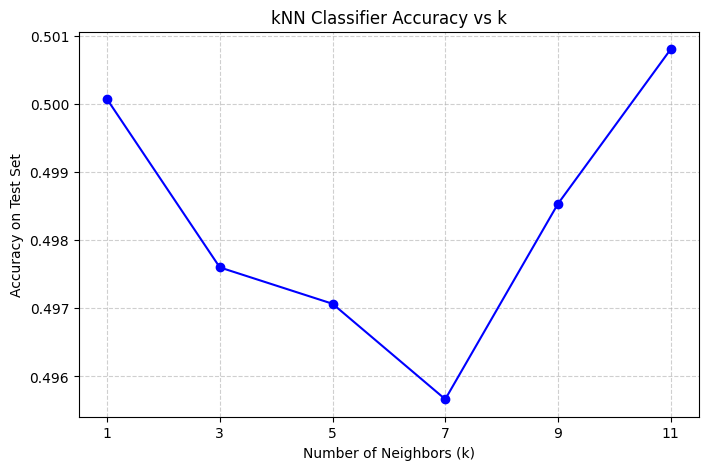

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined from train-test split

k_values = list(range(1, 12, 2))  # Odd values: 1, 3, 5, 7, 9, 11
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}: Accuracy = {acc:.4f}")

# Plot accuracy vs k
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title("kNN Classifier Accuracy vs k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy on Test Set")
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Assuming knn is your trained kNN model (e.g., with best k from A8)
# Also assuming you have: X_train, y_train, X_test, y_test

# Predict on training and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Compute precision, recall, F1-score for both sets
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print confusion matrices
print("Confusion Matrix - Training Data:")
print(cm_train)

print("\nConfusion Matrix - Test Data:")
print(cm_test)

# Print detailed classification reports (includes precision, recall, f1 per class)
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

# Print summary metrics
print(f"Training Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1-score: {f1_train:.4f}")
print(f"Test Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1-score: {f1_test:.4f}")


Confusion Matrix - Training Data:
[[10910  6592]
 [ 6635 10863]]

Confusion Matrix - Test Data:
[[3779 3722]
 [3766 3733]]

Classification Report - Training Data:
              precision    recall  f1-score   support

          No       0.62      0.62      0.62     17502
         Yes       0.62      0.62      0.62     17498

    accuracy                           0.62     35000
   macro avg       0.62      0.62      0.62     35000
weighted avg       0.62      0.62      0.62     35000


Classification Report - Test Data:
              precision    recall  f1-score   support

          No       0.50      0.50      0.50      7501
         Yes       0.50      0.50      0.50      7499

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.50     15000

Training Precision: 0.6221, Recall: 0.6221, F1-score: 0.6221
Test Precision: 0.5008, Recall: 0.5008, F1-score: 0.5008


Optional Section:
1. Create a normal distribution data, plot the graph and compare the normal distribution plot against the histogram plot.
2. Use different distance metric for kNN classifier by tuning the metric parameters of KNeighborsClassifier(). Observe the behaviour with change in the distance for classification.
3. Make an AUROC plot for your project for kNN classifier. Compare the results with the area obtained and infer.
4. Compare the performance of your developed kNN classifier (during 2nd Lab exercise) with that of the package provided model.

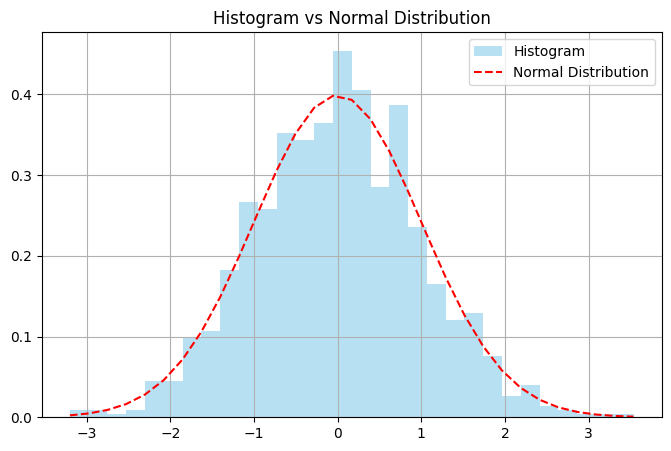

Distance metric accuracies: {'euclidean': 0.496, 'manhattan': 0.5001333333333333, 'chebyshev': 0.49773333333333336}


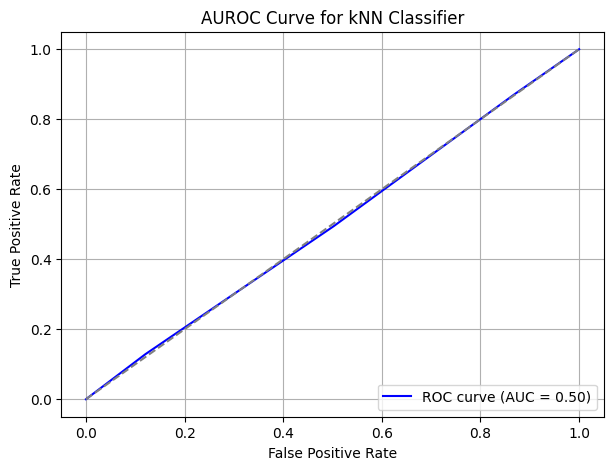

AUC Score: 0.499638333646678
Manual kNN Accuracy: 0.4960
Package kNN Accuracy: 0.4960
Final Test Accuracy: 0.496
Confusion Matrix:
 [[3711 3744]
 [3816 3729]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.50      0.50      7455
           1       0.50      0.49      0.50      7545

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.50      0.50      0.50     15000



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


# Function 1: Generate normal distribution data
def generate_normal_distribution_data(size=1000, mean=0, std_dev=1):
    return np.random.normal(loc=mean, scale=std_dev, size=size)

# Function 2: Plot histogram and normal distribution on the same graph
def plot_histogram_and_normal(data_array):
    plt.figure(figsize=(8, 5))
    count, bins, _ = plt.hist(data_array, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')
    normal_pdf = (1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5 * bins ** 2)
    plt.plot(bins, normal_pdf, 'r--', label='Normal Distribution')
    plt.title("Histogram vs Normal Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()

# Function 3: Preprocess dataset and split into train/test sets
def preprocess_data_split(input_df, feature_columns, target_column):
    X = input_df[feature_columns].values
    y = LabelEncoder().fit_transform(input_df[target_column])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Function 4: Train kNN classifier using scikit-learn
def train_knn_classifier(X_train, y_train, k_value=3, metric_type='minkowski'):
    model = KNeighborsClassifier(n_neighbors=k_value, metric=metric_type)
    model.fit(X_train, y_train)
    return model

# Function 5: Evaluate model accuracy, confusion matrix, classification report
def evaluate_knn_model(model, X_test, y_test):
    y_predicted = model.predict(X_test)
    acc = model.score(X_test, y_test)
    conf_matrix = confusion_matrix(y_test, y_predicted)
    class_report = classification_report(y_test, y_predicted)
    return acc, conf_matrix, class_report, y_predicted

# Function 6: Compare metrics across distance types
def compare_distance_metrics(X_train, X_test, y_train, y_test, metrics_list):
    accuracy_results = {}
    for metric in metrics_list:
        model = train_knn_classifier(X_train, y_train, k_value=3, metric_type=metric)
        accuracy = model.score(X_test, y_test)
        accuracy_results[metric] = accuracy
    return accuracy_results

# Function 7: Plot AUROC curve and return AUC score
def plot_auroc_curve(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = auc(fpr, tpr)
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUROC Curve for kNN Classifier')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    return auc_score

# Function 8: Manually implement kNN classifier using Euclidean distance
def manual_knn_predict(X_train, y_train, X_test, k_value=3):
    predictions = []
    for x_test_point in X_test:
        # Compute Euclidean distances
        distances = np.linalg.norm(X_train - x_test_point, axis=1)
        nearest_indices = np.argsort(distances)[:k_value]
        nearest_labels = y_train[nearest_indices]
        predicted_class = np.bincount(nearest_labels).argmax()
        predictions.append(predicted_class)
    return np.array(predictions)

# Function 9: Compare manual and package kNN classifier results
def compare_manual_vs_package_kNN(X_train, y_train, X_test, y_test, k_value=3):
    manual_predictions = manual_knn_predict(X_train, y_train, X_test, k_value)
    manual_accuracy = np.mean(manual_predictions == y_test)

    package_model = train_knn_classifier(X_train, y_train, k_value)
    package_accuracy, _, _, _ = evaluate_knn_model(package_model, X_test, y_test)

    return manual_accuracy, package_accuracy
# Load your dataset (update path and columns)
df = pd.read_csv("/content/MHDS.csv")
features = [
    'Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours',
    'Social_Media_Usage'
    # After encoding, you can also include: 'Gender', 'Occupation', etc.
]

target = 'Mental_Health_Condition'  # Target variable (binary classification)

# Split and preprocess
X_train, X_test, y_train, y_test = preprocess_data_split(df, features, target)

# 1. Normal distribution vs histogram
normal_data = generate_normal_distribution_data()
plot_histogram_and_normal(normal_data)

# 2. Accuracy for different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
metric_accuracies = compare_distance_metrics(X_train, X_test, y_train, y_test, distance_metrics)
print("Distance metric accuracies:", metric_accuracies)

# 3. AUROC curve and AUC score
knn_model = train_knn_classifier(X_train, y_train, k_value=3)
auc_value = plot_auroc_curve(knn_model, X_test, y_test)
print("AUC Score:", auc_value)

# 4. Manual vs package kNN comparison
manual_acc, package_acc = compare_manual_vs_package_kNN(X_train, y_train, X_test, y_test)
print(f"Manual kNN Accuracy: {manual_acc:.4f}")
print(f"Package kNN Accuracy: {package_acc:.4f}")

# 5. Confusion matrix and classification report from package model
final_accuracy, conf_matrix, class_report, y_pred = evaluate_knn_model(knn_model, X_test, y_test)
print("Final Test Accuracy:", final_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
